In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk
nltk.download("stopwords")
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from nltk.tokenize import word_tokenize
import seaborn as sns
import matplotlib.pyplot as plt
from string import punctuation

In [4]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [5]:
sw = stopwords.words('english')
pct = list(punctuation)
sw.extend(pct)

In [6]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
df=pd.read_csv("/content/IMDB Dataset.csv",error_bad_lines=False, engine="python")

In [9]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
df.shape

(50000, 2)

In [11]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [12]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [14]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [15]:
df['sentiment'].value_counts()

positive    25000
negative    25000
Name: sentiment, dtype: int64

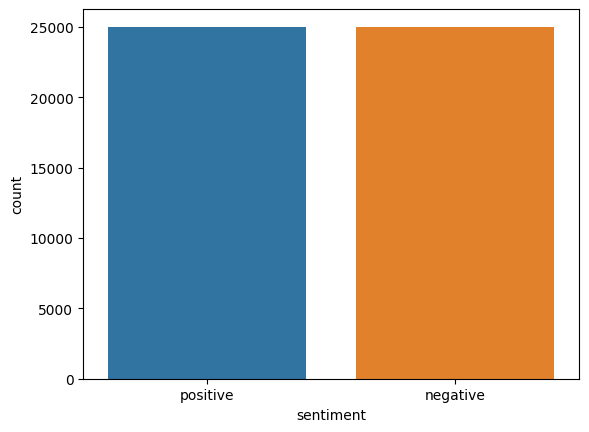

In [16]:
sns.countplot(x="sentiment",data=df)
plt.show()

In [17]:
label=LabelEncoder()
df["sentiment"]=label.fit_transform(df["sentiment"])

In [18]:
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1
...,...,...
49995,I thought this movie did a down right good job...,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0
49997,I am a Catholic taught in parochial elementary...,0
49998,I'm going to have to disagree with the previou...,0


In [19]:
lemma = WordNetLemmatizer()

In [20]:
def preprocess_text(ip_text):
  ip_text = ip_text.lower()
  ip_text = [lemma.lemmatize(w) for w in word_tokenize(ip_text) if w not in sw and len(w) > 2 and not w.isdigit()]
  return ' '.join(ip_text)

In [21]:
df["clean_review"]=df["review"].apply(preprocess_text)

In [22]:
df["clean_review"][0]

"one reviewer mentioned watching episode 'll hooked right exactly happened me. first thing struck brutality unflinching scene violence set right word trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use word. called nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home many aryan muslim gangsta latino christian italian irish .... scuffle death stare dodgy dealing shady agreement never far away. would say main appeal show due fact go show would n't dare forget pretty picture painted mainstream audience forget charm forget romance ... n't mess around first episode ever saw struck nasty surreal could n't say ready watched developed taste got accustomed high level graphic violence violence injustice crooked guard 'll sold nickel inmate 'll kill order get away well mannered middle class inmate turned prison bitch due lack street skill p

In [23]:
df

,review,sentiment,clean_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching episode 'll ho...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...
...,...,...,...
49995,I thought this movie did a down right good job...,1,thought movie right good job n't creative orig...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",0,bad plot bad dialogue bad acting idiotic direc...
49997,I am a Catholic taught in parochial elementary...,0,catholic taught parochial elementary school nu...
49998,I'm going to have to disagree with the previou...,0,going disagree previous comment side maltin on...


In [24]:
x=df["clean_review"]
y=df["sentiment"]

In [25]:
tv=TfidfVectorizer(max_features=5000)
x=tv.fit_transform(x).toarray()

In [26]:
x.shape

(50000, 5000)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [28]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((40000, 5000), (10000, 5000), (40000,), (10000,))

In [29]:
mb=MultinomialNB()
mb.fit(x_train,y_train)

MultinomialNB()

In [30]:
mb.score(x_test,y_test)

0.8522

In [31]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8865

In [32]:
pred=model.predict(x_test)

In [33]:
new_df=pd.DataFrame(np.c_[y_test,pred],columns=["Actual value","Predicted value"])

In [34]:
new_df

,Actual value,Predicted value
0,1,1
1,0,0
2,0,1
3,1,1
4,1,1
...,...,...
9995,0,0
9996,0,0
9997,1,1
9998,1,0


In [35]:
accuracy_score(y_test,pred)

0.8865

In [36]:
confusion_matrix(y_test,pred)

array([[4418,  617],
       [ 518, 4447]])

In [37]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5035
           1       0.88      0.90      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [38]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train,y_train)
neigh.score(x_test,y_test)

0.7272